In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# import data
df= pd.read_csv('cost_and_yield.csv')

In [3]:
# View first five rows of data
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
# Shape of the dataset
df.shape

(49, 6)

In [5]:
# Basic statistics of the data
df.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [6]:
# check missing values
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [7]:
# Name of the crop types
df['Crop'].unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [8]:
# Name of the states
df['State'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

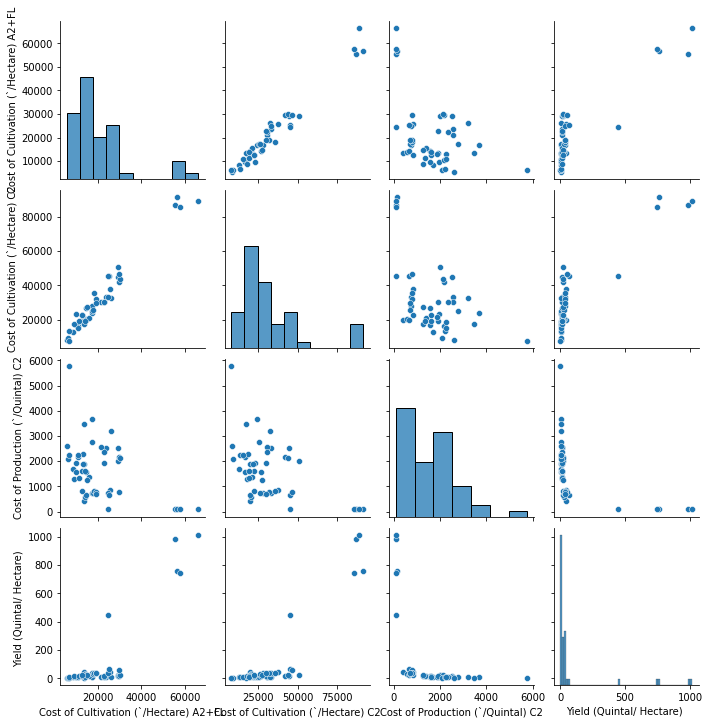

In [9]:
# Scatterplots between each numerical feature
sns.pairplot(df)

In [10]:
# Group the data based on crop type
df1 = pd.DataFrame(df.groupby(["Crop"],as_index=False,).sum())
df1

,Crop,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,68038.23,108599.23,12458.65,42.03
1,COTTON,141434.37,214790.99,11359.83,93.86
2,GRAM,58597.55,96543.87,8963.00,52.79
3,GROUNDNUT,106413.91,140940.38,13523.19,51.44
4,MAIZE,83050.75,119186.49,3872.83,153.99
5,MOONG,35593.35,53881.98,14950.50,20.98
6,PADDY,114050.70,178841.11,3638.67,231.48
7,RAPESEED AND MUSTARD,61302.45,106117.16,7077.97,71.60
8,SUGARCANE,260823.58,398275.13,493.24,3952.48
9,WHEAT,68508.44,119692.33,3068.47,135.60


In [11]:
df.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

<AxesSubplot:xlabel='Crop'>

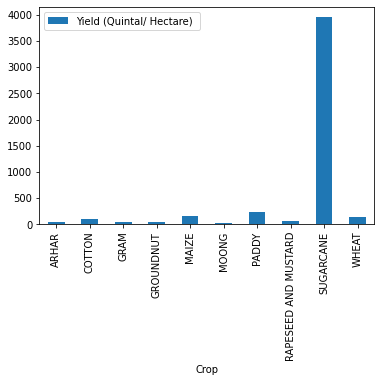

In [12]:
# Yield of each crop
df1.plot.bar(x='Crop', y='Yield (Quintal/ Hectare) ')

<AxesSubplot:xlabel='Crop'>

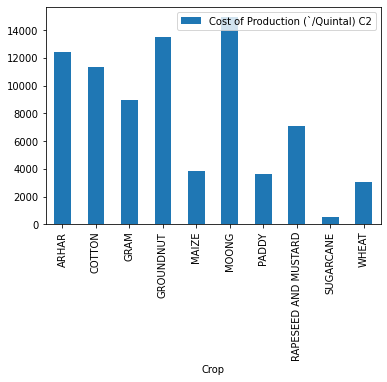

In [13]:
# Production cost of each crop
df1.plot.bar(x='Crop', y='Cost of Production (`/Quintal) C2')

In [14]:
# Group the data based on state
df2 = df.groupby(["State"],as_index=False).sum()
df2

,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,Andhra Pradesh,200500.69,315029.07,14273.65,915.41
1,Bihar,13513.92,19857.70,404.43,42.95
2,Gujarat,79776.83,110820.34,7606.88,53.70
3,Haryana,44634.24,71525.72,3378.47,39.84
4,Karnataka,100129.18,149148.83,12102.17,1030.81
5,Madhya Pradesh,30954.72,57068.85,3641.79,46.82
6,Maharashtra,148360.96,210923.27,13169.10,789.50
7,Orissa,22961.59,34176.03,3329.18,35.43
8,Punjab,72147.43,131543.55,3478.42,131.63
9,Rajasthan,59683.16,90722.93,6443.97,85.17


<AxesSubplot:xlabel='State'>

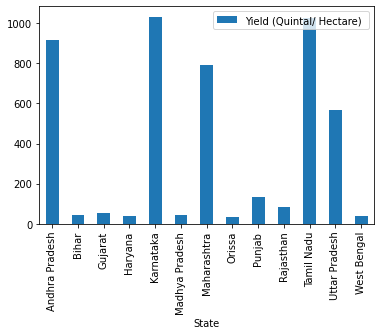

In [15]:
# Yield of each state
df2.plot.bar(x='State', y='Yield (Quintal/ Hectare) ')

<AxesSubplot:xlabel='State'>

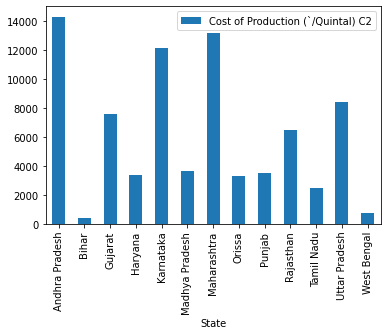

In [16]:
# Production cost of each state
df2.plot.bar(x='State', y='Cost of Production (`/Quintal) C2')

In [17]:
# Create dummy variables for the states
state_dummy = pd.get_dummies(df.State)
print(state_dummy.head())

   Andhra Pradesh  Bihar  Gujarat  Haryana  Karnataka  Madhya Pradesh  \
0               0      0        0        0          0               0   
1               0      0        0        0          1               0   
2               0      0        1        0          0               0   
3               1      0        0        0          0               0   
4               0      0        0        0          0               0   

   Maharashtra  Orissa  Punjab  Rajasthan  Tamil Nadu  Uttar Pradesh  \
0            0       0       0          0           0              1   
1            0       0       0          0           0              0   
2            0       0       0          0           0              0   
3            0       0       0          0           0              0   
4            1       0       0          0           0              0   

   West Bengal  
0            0  
1            0  
2            0  
3            0  
4            0  


In [18]:
# Create dummy variables for crop types
Crop_dummy = pd.get_dummies(df.Crop)
print(Crop_dummy.head())

   ARHAR  COTTON  GRAM  GROUNDNUT  MAIZE  MOONG  PADDY  RAPESEED AND MUSTARD  \
0      1       0     0          0      0      0      0                     0   
1      1       0     0          0      0      0      0                     0   
2      1       0     0          0      0      0      0                     0   
3      1       0     0          0      0      0      0                     0   
4      1       0     0          0      0      0      0                     0   

   SUGARCANE  WHEAT  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  


In [19]:
# Keep only the cost of production and the yield and drop the information not necessaty to create a model
yield_cost =df.drop(['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2'], axis= 1)

In [20]:
# Join the dummy variables created for the categorical variables
yield_cost= pd.concat([yield_cost,state_dummy, Crop_dummy], axis= 1)
yield_cost = yield_cost.drop(['Crop', 'State'], axis= 1)
yield_cost.head()

,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Andhra Pradesh,Bihar,Gujarat,Haryana,Karnataka,Madhya Pradesh,Maharashtra,Orissa,...,ARHAR,COTTON,GRAM,GROUNDNUT,MAIZE,MOONG,PADDY,RAPESEED AND MUSTARD,SUGARCANE,WHEAT
0,1941.55,9.83,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2172.46,7.47,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1898.30,9.59,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3670.54,6.42,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2775.80,8.72,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# Create independent and dependent variables
X = yield_cost.drop(['Cost of Production (`/Quintal) C2'], axis =1)
y = yield_cost['Cost of Production (`/Quintal) C2']